## Análise sobre gastos de plano de sáude 

dados retidados do link: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
#imports de libs usadas na análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#impotando e lendo o dataset

df = pd.read_csv(r'C:\Users\Lucas\Desktop\Projetos\saude\data\insurance.csv')
df.head(10) #mostrar as primeiras 10 linhas

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#conferindo os dados do dataset
df.info()
print('-'*50)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
--------------------------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.0000

##### Primeiro iremos analisar a questao de fumantes e não fumantes no nosso dataset

In [4]:
#proporção de fumante e não fumantes

df['smoker'].value_counts(normalize=True)

smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

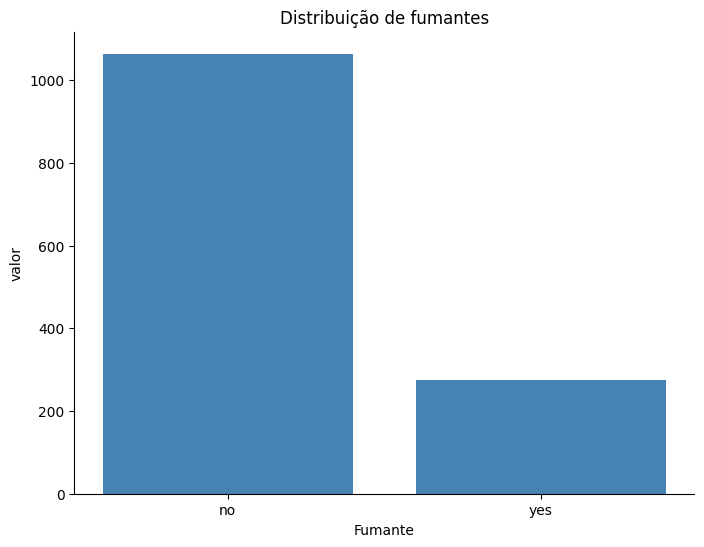

In [5]:
#plotando grafico de barras sobre numero de fumantes
fumantes_counts = df['smoker'].value_counts()

plt.figure(figsize=(8,6))

plt.bar(
    fumantes_counts.index,
    fumantes_counts.values,
    color=['steelblue']
)

plt.xlabel('Fumante')
plt.ylabel('valor')
plt.title('Distribuição de fumantes')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

O número de não fumantes é muito maior do que fumantes no dataset.

In [6]:
#contem difença de cobrança entre fumante e nao fumantes ?

df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

analisando a média de valor cobrado para fumante e não fumantes, é notavel que o valor para fumantes é maior.

In [7]:
#conferindo a diferença entre homens e mulheres fumantes e não fumantes
df.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: count, dtype: int64

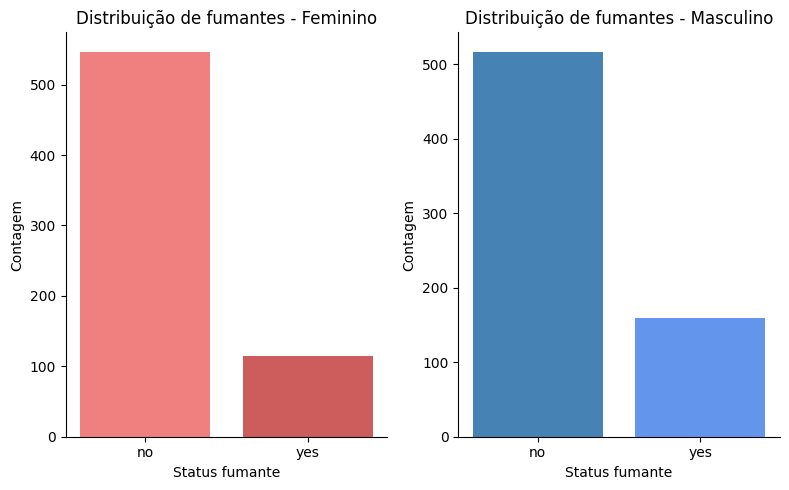

In [8]:
#plotando graficos de barras sobre nº de fumantes nos sexos masc e fem
fem_fumante = df[df['sex']== 'female'].copy()
fem_fumante_cont = fem_fumante['smoker'].value_counts()

masc_fumante = df[df['sex']== 'male'].copy()
masc_fumante_cont = masc_fumante['smoker'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

axs[0].bar(
    fem_fumante_cont.index,
    fem_fumante_cont.values,
    color=['lightcoral','indianred']
)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xlabel('Status fumante')
axs[0].set_ylabel('Contagem')
axs[0].set_title('Distribuição de fumantes - Feminino')



axs[1].bar(
    masc_fumante_cont.index,
    masc_fumante_cont.values,
    color=['steelblue','cornflowerblue'] 
)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_xlabel('Status fumante')
axs[1].set_ylabel('Contagem')
axs[1].set_title('Distribuição de fumantes - Masculino')



plt.tight_layout()
plt.show()


Os números e o gráfico deixam bem claro que os fumantes tanto do sexo feminino quanto do masculino se parecem, os fumante e não fumantes

Vamos análisar agora a media de cobrança por sexo para saber se os valores cobrados variam de acordo com o sexo

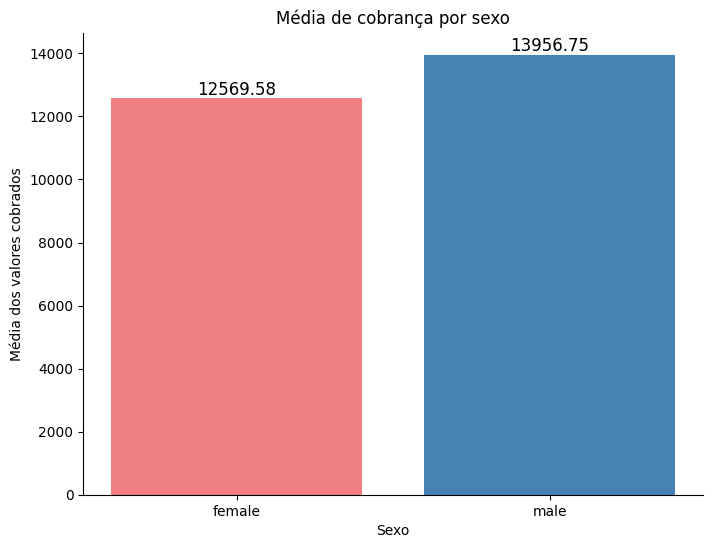

In [9]:
media_cobran_sex =df.groupby('sex')['charges'].mean()

fig,ax = plt.subplots(figsize=(8,6))
colors = ('lightcoral','steelblue')
ax.bar(media_cobran_sex.index,media_cobran_sex.values, color = colors)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Média dos valores cobrados')
ax.set_xlabel('Sexo')
ax.set_title('Média de cobrança por sexo')
ax.text(0,media_cobran_sex.values[0],f'{media_cobran_sex.values[0]:.2f}',ha='center',va='bottom',fontsize =12)
ax.text(1,media_cobran_sex.values[1],f'{media_cobran_sex.values[1]:.2f}',ha='center',va='bottom',fontsize =12)
plt.show()

In [10]:
diferença_percente = (media_cobran_sex['male']-media_cobran_sex['female']) / media_cobran_sex['female'] * 100
print(f'O valor cobrado para os homens é de {diferença_percente:.2f}% maior em ralação ao valor cobrado para mulheres')

O valor cobrado para os homens é de 11.04% maior em ralação ao valor cobrado para mulheres


Iremos separa os bmi's por região do dataframe, para busacar dados, e ver se eles se relacionam. Regiao x valor bmi

In [11]:
# Analisando quais regioes estao disponiveis no dataframe
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

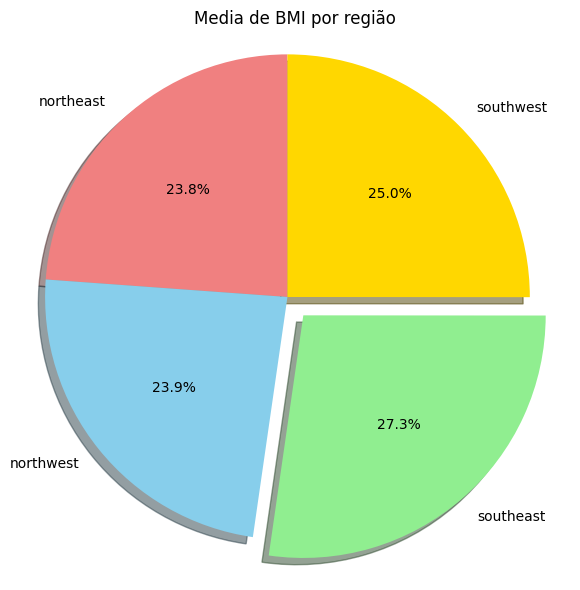

In [12]:
media_bmi_por_regiao = df.groupby('region')['bmi'].mean()
fig, ax = plt.subplots(figsize=(6,6))
labels= media_bmi_por_regiao.index
ax.pie(media_bmi_por_regiao.values,labels=labels ,autopct='%.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgreen', 'gold'], shadow=True,explode=(0,0,0.1,0,))
ax.set_title('Media de BMI por região')
ax.axis('equal')
plt.tight_layout()
plt.show()


Nota-se que a região southeast contem uma média de BMI maior que as outras 3 regiões. 

#### Continuando a análise sobre BMI iremos analisar a cobrança por BMI e buscar insghts.

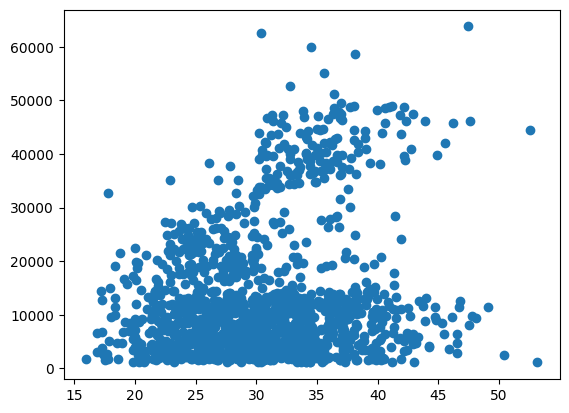

In [14]:
plt.scatter(data=df, x = 'bmi', y= 'charges')
plt.show()